<a href="https://colab.research.google.com/github/fitagdinov/Clonned/blob/master/Tel_Array.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##подключение пакетов 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#import tensorflow.keras as kr
import pandas as pd
import seaborn as sns
from google.colab import drive

%matplotlib inline

In [2]:
# from google.colab import output
# output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/5/Beep-09.ogg").play()')
from google.colab import output
#output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

In [3]:
pip install tqdm

In [4]:
import zipfile
from tqdm.notebook import tqdm_notebook

##извлечение файлов и нормировка


In [5]:
#f=open(r"/content/drive/MyDrive/Colab Notebooks/data from collab.zip",'r')
#file=zipfile.ZipFile(f)
with zipfile.ZipFile("data from collab.zip") as zip_data:
  zip_data.printdir()
  zip_data.extractall()
  #output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

File Name                                             Modified             Size
fe.dat                                         2021-09-10 23:20:44      2437897
he.dat                                         2021-09-10 23:20:42      2527546
n.dat                                          2021-09-10 23:20:40      2527481
p.dat                                          2021-09-10 23:20:30      2437425
p.paramnames                                   2021-09-10 23:21:46          134
task5_gamma.dat                                2021-09-10 23:21:38      3844863
task5_p.dat                                    2021-09-10 23:21:34      3842405
task5_p.paramnames                             2021-09-10 23:21:44          134
task5_unknown.dat                              2021-09-10 23:21:24       640383
unknown1.dat                                   2021-09-10 23:21:12       609402
unknown2.dat                                   2021-09-10 23:21:14       625251
unknown3.dat                            

In [6]:
paramnames=open("p.paramnames")
name=paramnames.readlines()
print(name)
file_fe=pd.read_csv("fe.dat",sep=' ',names=name)
file_he=pd.read_csv("he.dat",sep=' ',names=name)
file_n=pd.read_csv("n.dat",sep=' ',names=name)
file_p=pd.read_csv("p.dat",sep=' ',names=name)
file_n[:3]

['theta\n', 'S800\n', 'ndet\n', 'ndet_excluded\n', 'chi2\n', 'a_Linsley\n', 'AoP\n', 'AoP_slope\n', 'S3\n', 'S4.5\n', 'total_signal\n', 'asymm\n', 'npeaks\n', 'npeaks_highest\n', 'asymmpeaks_u\n', 'asymmpeaks_l\n']


,theta\n,S800\n,ndet\n,ndet_excluded\n,chi2\n,a_Linsley\n,AoP\n,AoP_slope\n,S3\n,S4.5\n,total_signal\n,asymm\n,npeaks\n,npeaks_highest\n,asymmpeaks_u\n,asymmpeaks_l\n
0,30.24,31.9005,12,0,0.78576,0.473569,400.123,-349.005,1.964063,3.017109,165.525,0.297806,66,11,15,10
1,30.96,43.6306,10,0,1.14002,0.646790,396.505,-284.943,1.828066,2.493158,388.350,0.126819,76,11,11,7
2,23.65,39.2666,9,0,1.03139,0.561117,466.047,-549.563,1.757809,1.493493,1044.720,0.101842,72,6,12,8


In [7]:
all_file=pd.concat([file_fe,file_he,file_p,file_n])#,keys=['fe','he','p','n'])
all_file=all_file.sample(frac=1)

In [8]:
mean=all_file.mean()
#print(mean)
std=all_file.std()
#print(std)
new_all_file=all_file-mean
new=new_all_file.div(std,axis="columns")
all_file=new

In [9]:
def range_abs_1(file):
  max_abs=file.abs().max()
  file=file.div(max_abs,axis="columns")
  return ()
max_abs=range_abs_1(all_file)

In [10]:
#all_file=all_file.div(max_abs,axis="columns")

In [11]:
corr_name=name[:2]+name[4:11]
new=all_file[corr_name]
all_file=new

In [12]:
num=len(all_file)
print(num)
frac_train=0.8    #80%
num_train=int(num*0.9)
print(num_train,"number train")
num_test=num-num_train
train_data=all_file[:num_train]
test_data=all_file[num_train:]
train_data=train_data.to_numpy()

test_data=test_data.to_numpy()
train_data[0]
all_file.shape

80000
72000 number train


(80000, 9)

In [13]:
# mean=all_file.mean()
# print(type (all_file))
# print(mean.shape)
# std=all_file.std()
# print(std.shape)
# new_all_file=all_file-mean
# new=new_all_file.div(std,axis="columns")
# all_file=new

нормировка (0,1)

In [14]:
# corr_name=name[:2]+name[4:11]
# new=all_file[corr_name]
# all_file=new

## Корреляция


,theta\n,S800\n,chi2\n,a_Linsley\n,AoP\n,AoP_slope\n,S3\n,S4.5\n,total_signal\n
theta\n,1.000000,-0.415539,0.061855,-0.129277,-0.366602,0.262355,0.483501,0.313795,-0.011006
S800\n,-0.415539,1.000000,-0.152151,-0.152874,0.613344,-0.220324,-0.311954,-0.162651,0.237589
chi2\n,0.061855,-0.152151,1.000000,-0.299145,-0.146826,0.366479,0.398954,0.461997,-0.039472
a_Linsley\n,-0.129277,-0.152874,-0.299145,1.000000,-0.083918,-0.376202,-0.375936,-0.421265,-0.091692
AoP\n,-0.366602,0.613344,-0.146826,-0.083918,1.000000,-0.628981,-0.312511,-0.228431,0.079558
AoP_slope\n,0.262355,-0.220324,0.366479,-0.376202,-0.628981,1.000000,0.495785,0.516001,0.030793
S3\n,0.483501,-0.311954,0.398954,-0.375936,-0.312511,0.495785,1.000000,0.886296,0.231495
S4.5\n,0.313795,-0.162651,0.461997,-0.421265,-0.228431,0.516001,0.886296,1.000000,0.016295
total_signal\n,-0.011006,0.237589,-0.039472,-0.091692,0.079558,0.030793,0.231495,0.016295,1.000000


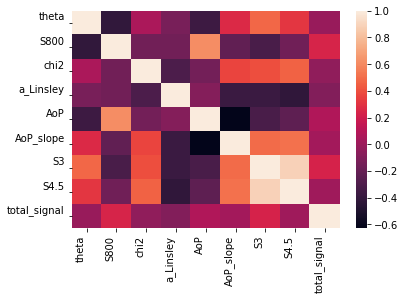

In [15]:
def correlation(df, show=False):
  corr_matrix=df.corr()
  if show:
    sns.heatmap(corr_matrix)
  return (corr_matrix)
correlation(all_file,show=True)

отрисовка произвольных 20000 значений друг от друга. по диагонале отрисовка гистограм

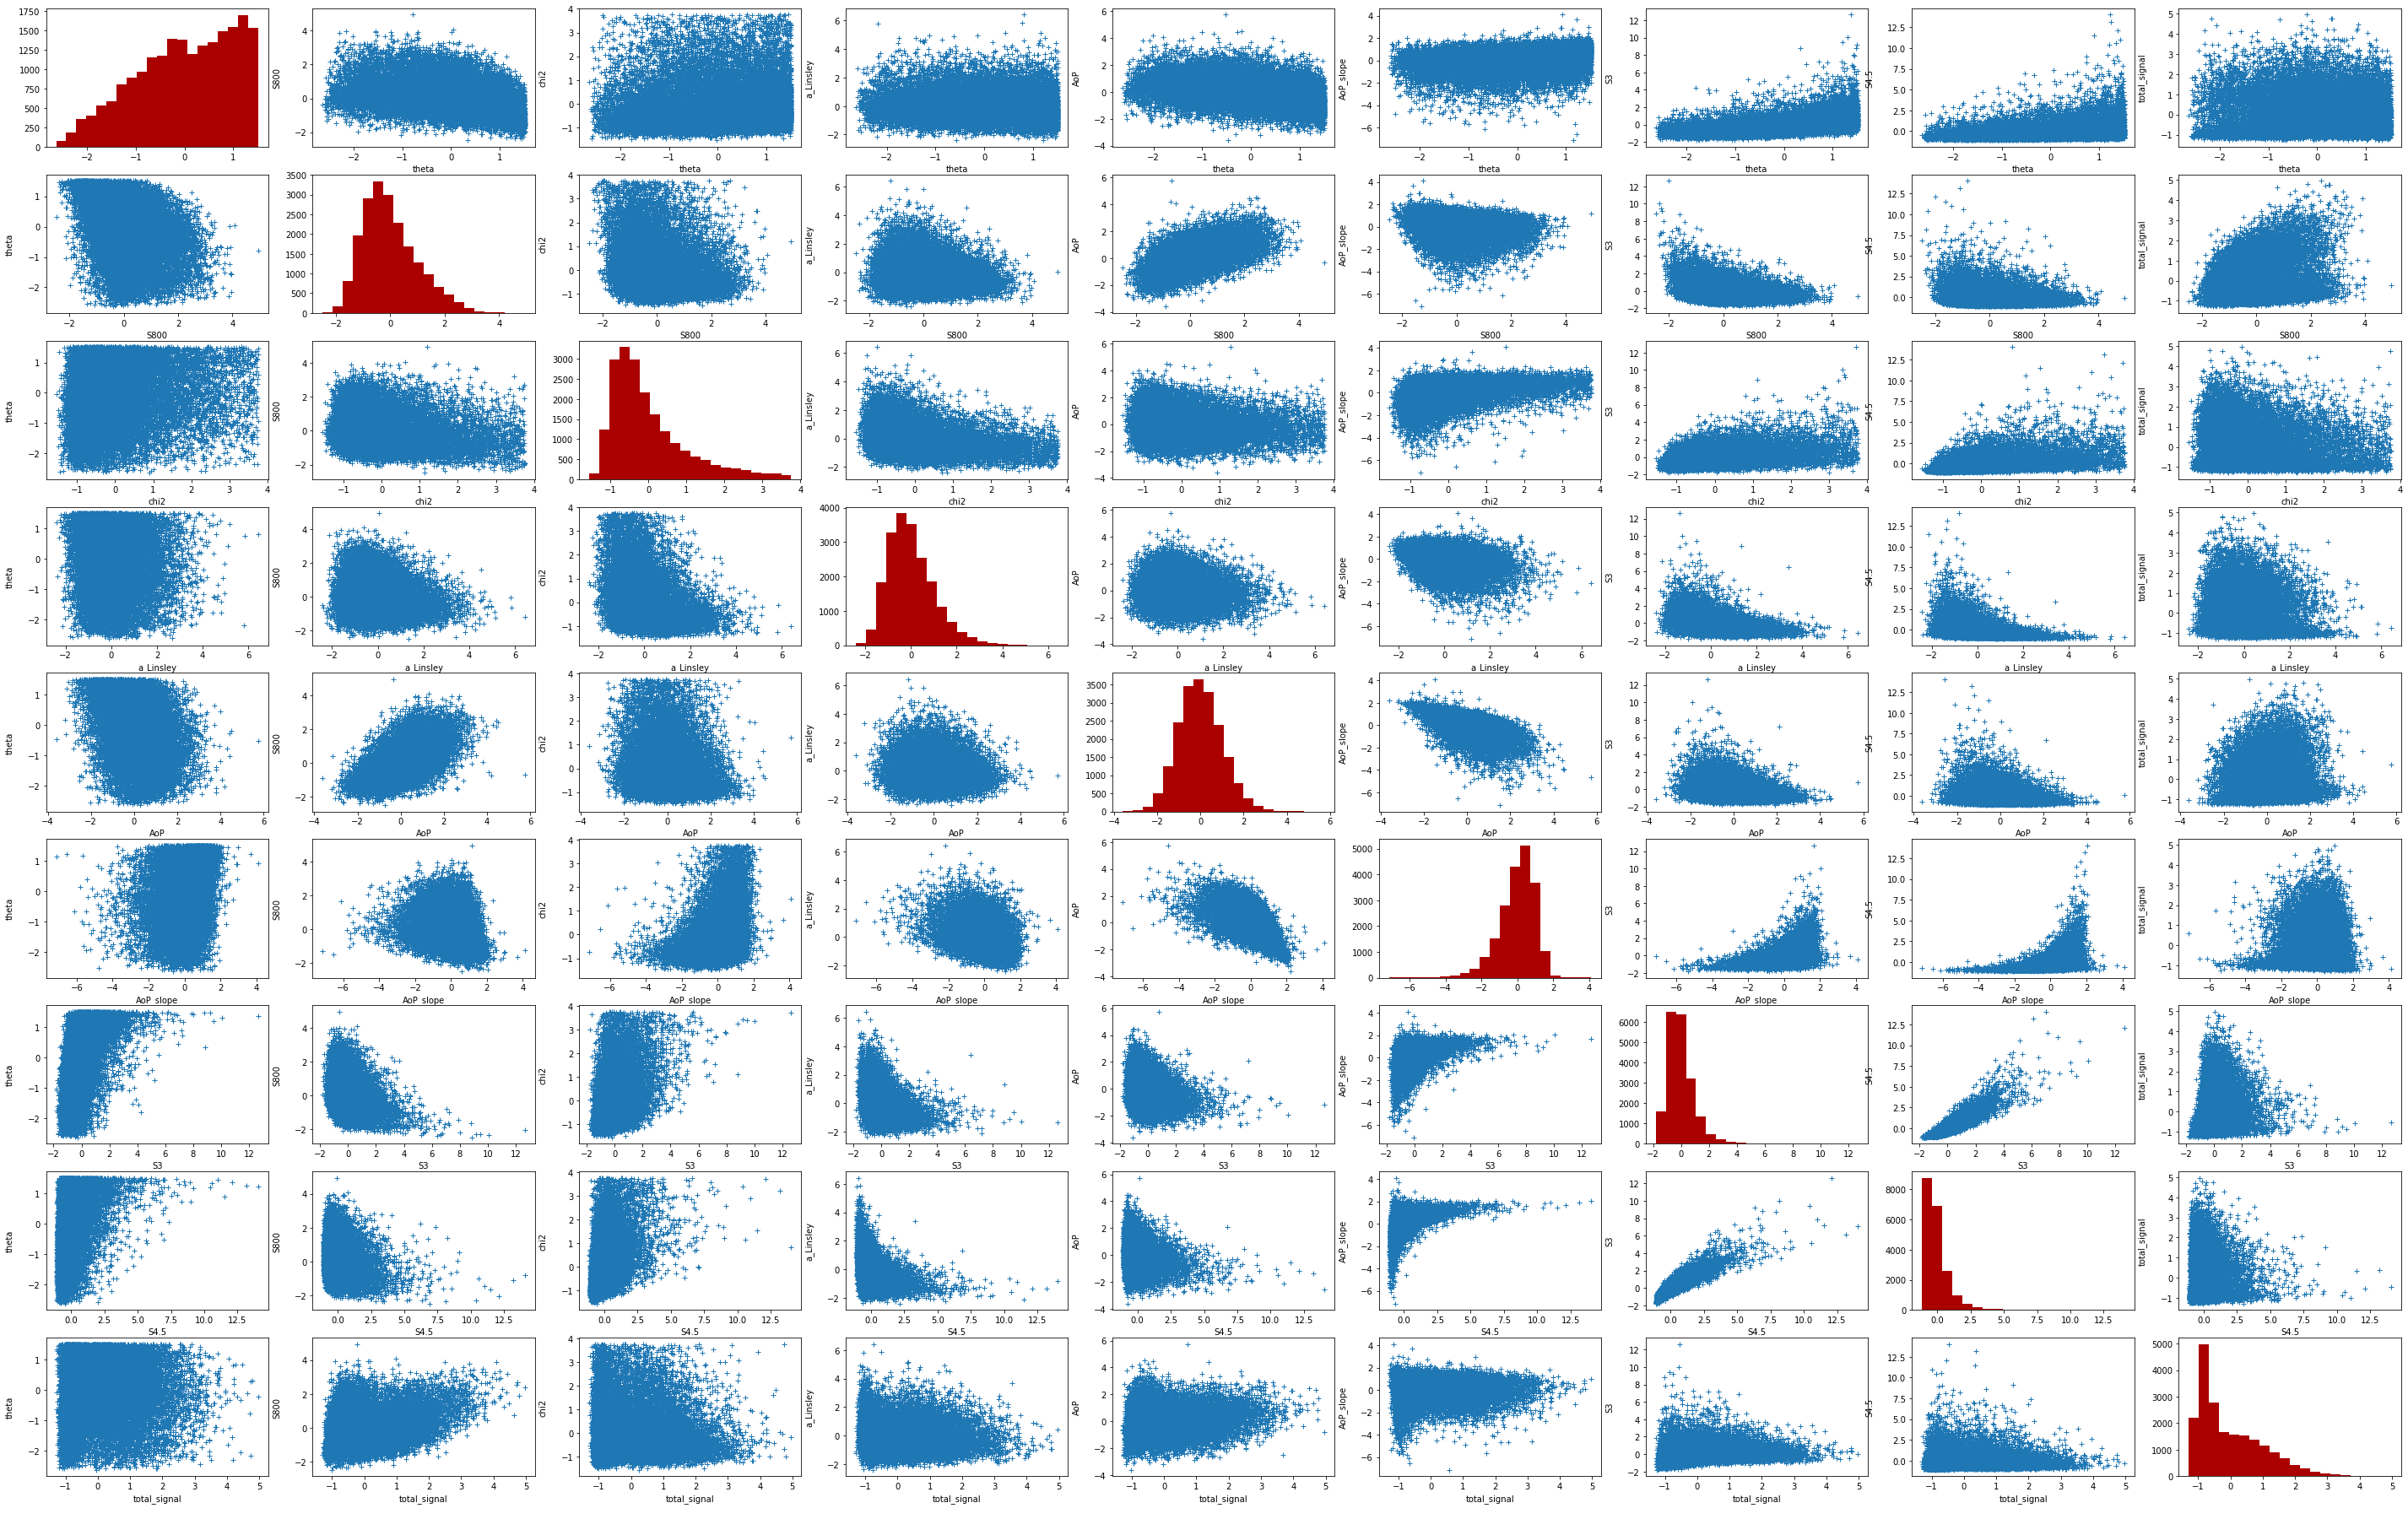

In [16]:
corr_parametrs=name[0:6]+name[8:10]
#print(corr_parametrs)
#print(axs)
#axs[1][0].plot(np.array([0,1,2,3]),np.array([0,2,4,6]))
def corr_plot(data,param):
  n=len(param)
  fig,axs=plt.subplots(n,n,figsize=(50,32))
  for i in range(n):
    x_name=param[i]
    x=data[x_name][:20000]
    #print(len(x))
    for j in range(n):
      y_name=param[j]
      y=data[y_name][:20000]
      #print(len(y))
      if i!=j:
        axs[i][j].plot(x,y,'+')
        axs[i][j].set_xlabel(x_name)
        axs[i][j].set_ylabel(y_name)
      else:
        axs[i][i].hist(x,bins=20,color='#AA0000')
corr_plot(all_file[:20000],corr_name)


# output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

In [17]:
noise_dim=500
l=len(corr_name)
l

9

## создание гениратора и дискриминатора 

In [18]:
def Generator_model(): 
  # model = tf.keras.Sequential()
  # #model.add(tf.keras.layers.Dense(units=100,activation=tf.keras.activations.relu))
  # model.add(tf.keras.layers.Dense(units=40,use_bias=False,activation=tf.keras.activations.tanh, input_shape=(noise_dim,)))
  # model.add(tf.keras.layers.BatchNormalization())
  # model.add(tf.keras.layers.Dense(units=40,use_bias=False,activation=tf.keras.activations.tanh))
  # model.add(tf.keras.layers.BatchNormalization())
  # model.add(tf.keras.layers.Dense(units=20,use_bias=False,activation=tf.keras.activations.tanh))
  # model.add(tf.keras.layers.BatchNormalization())
  # model.add(tf.keras.layers.Dense(units=l,use_bias=False,activation=tf.keras.activations.tanh))

  input_tensor=tf.keras.Input(shape=(noise_dim,))
  x=tf.keras.layers.Dense(units=100,use_bias=False,activation=tf.keras.activations.tanh)(input_tensor)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.Dense(units=40,use_bias=False,activation=tf.keras.activations.tanh)(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.Dense(units=40,use_bias=False,activation=tf.keras.activations.tanh)(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.Dense(units=20,use_bias=False,activation=tf.keras.activations.tanh)(x)
  x=tf.keras.layers.BatchNormalization()(x)

  x=tf.keras.layers.Dense(units=l,use_bias=False,activation=tf.keras.activations.tanh)(x)

  model= tf.keras.Model(input_tensor,x)
  return model

In [19]:
def Discriminator_model():
  model=tf.keras.Sequential()
  #model.add(tf.keras.layers.Dense(units=16,activation=tf.keras.activations.relu))
  model.add(tf.keras.layers.Dense(units=l*l,activation=tf.keras.activations.relu,input_shape=(l,)))
  model.add(tf.keras.layers.Dense(units=32,activation=tf.keras.activations.relu))
  #model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dense(units=20,activation=tf.keras.activations.relu))
  #model.add(tf.keras.layers.Dense(units=20,activation=tf.keras.activations.relu))
  #model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dense(units=1,activation=tf.keras.activations.sigmoid))
  return model

In [20]:


generator = Generator_model()
discriminator=Discriminator_model()
batch=32

noise = tf.random.normal(shape=(batch,noise_dim))
# print(noise)
generated_data = generator(noise, training=False)
print(generated_data.shape,'generated_data')
# #print(np.array(list(generated_data)))

# #g=np.array(g)
# print(generated_data)
# print(generated_data.shape)
decision = discriminator(generated_data,'decision')
#print (decision)

(32, 9) generated_data


In [21]:
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 81)                810       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2624      
_________________________________________________________________
dense_7 (Dense)              (None, 20)                660       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 4,115
Trainable params: 4,115
Non-trainable params: 0
_________________________________________________________________


In [22]:
generator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense (Dense)                (None, 100)               50000     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 40)                4000      
_________________________________________________________________
batch_normalization_1 (Batch (None, 40)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1600      
_________________________________________________________________
batch_normalization_2 (Batch (None, 40)                160   

##loss and generat_new_data


In [23]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    #real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    #fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    real_loss=sum(tf.keras.losses.mean_squared_error(tf.ones_like(real_output), real_output))/batch
    fake_loss=sum(tf.keras.losses.mean_squared_error(tf.zeros_like(fake_output), fake_output))/batch
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
  #return cross_entropy(tf.ones_like(fake_output), fake_output)
  return sum(tf.keras.losses.mean_squared_error(tf.ones_like(fake_output), fake_output))/batch
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [24]:
def generat_new_data(num,batch=1,name=corr_name):
  #num - size dataset
  noise=tf.random.normal(shape=(batch,noise_dim))
  data=generator(noise)
  data=data.numpy()
  df=pd.DataFrame(data,columns=name)
  for i in range(1,num):
    noise=tf.random.normal(shape=(batch,noise_dim))
    data=generator(noise)
    data=data.numpy()
    d=pd.DataFrame(data,columns=name)
    #print(d)
    df=df.append(d)
  return (df)

print(generat_new_data(5))


    theta\n    S800\n    chi2\n  ...      S3\n    S4.5\n  total_signal\n
0 -0.678733 -0.252148  0.075735  ...  0.313728  0.333872       -0.303919
0  0.352627 -0.332329 -0.778616  ...  0.854725  0.403427        0.631235
0 -0.053046  0.709714  0.087803  ... -0.315555 -0.566487       -0.128665
0  0.019324  0.085722  0.287630  ...  0.223013 -0.258342        0.453826
0  0.116695  0.424861  0.138809  ... -0.266755 -0.808029       -0.032574

[5 rows x 9 columns]


## train

In [25]:

# def train_step(data,show_disc_loss=False):
#   with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
    

#     noise=tf.random.normal([1, noise_dim])# 
#     fake_data=generator(noise)

#     real_output=discriminator(data,training=True)
#     fake_output=discriminator(fake_data,training=True)

#     disc_loss=discriminator_loss(real_output,fake_output)
#     gen_loss=generator_loss(fake_output)
#     #print(gen_loss)
#     #print(generator.trainable_variables,'gfgfgfgfg')
#     #disc_loss=tf.keras.losses.mean_squared_error()
#   #tensorflow
#   gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
#   gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
#   #print(gradients_of_discriminator,'\n\n\n')
#   #print(discriminator.trainable_variables,'\n\n\n')

#   generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
#   discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
#   if show_disc_loss:
#     return disc_loss
#   #discriminator.compile(optimizer=discriminator_optimizer,loss=disc_loss)
#   #generator.compile(optimizer=generator_optimizer,loss=gen_loss)





In [26]:
# np.zeros((1,3))

In [27]:
# def train_step_3(data,batch):#len(data)=batch
#   with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
#     real_output=np.zeros((batch))
#     fake_output=np.zeros((batch))
#     for i in range(batch):
#       noise=tf.random.normal([1, 1000])# 
#       fake_data=generator(noise)

#       real_output[i]=discriminator(data[i],training=True)
#       fake_output[i]=discriminator(fake_data,training=True)

#     disc_loss=discriminator_loss(real_output,fake_output)
#     gen_loss=generator_loss(fake_output)

#   gen_loss=sum(batch_gen_loss)/batch
#   disc_loss=sum(batch_disc_loss)/batch
#   gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
#   gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
#   #print(gradients_of_discriminator,'\n\n\n')
#   #print(discriminator.trainable_variables,'\n\n\n')

#   generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
#   discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [28]:
# epochs=1
# disc_loss_list=[]
# #corr_file= open("corr_file.csv',mode='w') 
# def train(epochs,train_data):
#   with pd.ExcelWriter('output.xlsx',mode='wa') as writer:
#     for i in tqdm_notebook(range(epochs),desc="all progrss"):
#       k=0
#       for step_data in tqdm_notebook(train_data,desc="in epoch number:"+str(i)):
#         k+=1
#         #print(step_data.shape)
#         reshape_step_data=np.reshape(step_data,(1,16))
#         #print(reshape_step_data)
#         #print(reshape_step_data.shape)
#         disc_loss=train_step(reshape_step_data,show_disc_loss=True)
#         disc_loss_list.append(disc_loss)
#         # вывод каждые 8000 матрицу корреляции и щапись в файл
#         if (k%8000)==0:
#           sheet_name='sheet'+(str (k//8000))
#           corr_dataset=generat_new_data(1000)
#           matrix=correlation(corr_dataset)
#           print(matrix)
#           matrix.to_excel(writer,sheet_name=sheet_name)
          



# train(epochs,train_data[:500])
# output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

In [29]:
# print(len(disc_loss_list))
# true_data=all_file[:2]
# print(all_file[:2],'true_data')
# n=np.random.normal(size=(1,500))
# fake=generator(n)
# print(fake,'fake')
# her=np.random.normal(0,size=(1,16))
# print(fake,'fake')
# predict=discriminator(true_data.to_numpy())
# print(predict,'predict')
# fake_predict=discriminator(her)
# print(fake_predict,'fake_predict')
# #disc_loss_list=[]
# #print(disc_loss_list[1000])
# plt.plot(disc_loss_list[:700])

## попытки Batch

In [30]:
def train_step_batch(data,batch,show_loss=False):#len(data)=batch
  with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
      noise=tf.random.normal(shape=(batch,noise_dim))
      fake_data=generator(noise)

      real_output=discriminator(data,training=True)
      fake_output=discriminator(fake_data,training=True)

      disc_loss=discriminator_loss(real_output,fake_output)
      gen_loss=generator_loss(fake_output)
  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
  #print(gradients_of_discriminator,'\n\n\n')
  #print(discriminator.trainable_variables,'\n\n\n')

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
  if show_loss:
    return ((disc_loss,gen_loss))


внизу прописан batch. не уверен что он работатет правильно, но оно работает. генератор получает шум (batch,noise_dim) дискриминатор получает данные в пакете размером batch.

In [31]:
batch=64
disc_loss_list=[]
gen_loss_list=[]
epochs=10
#corr_file= open("corr_file.csv',mode='w') 
def train_2(epochs,train_data,batch):
  #with pd.ExcelWriter('output_batch.xlsx',mode='wa') as writer:
    for i in tqdm_notebook(range(epochs),desc="all progrss"):
      k=0
      lim=len(train_data)//batch
      bar=lim//8
      for num in tqdm_notebook(range (0,len(train_data),batch),desc="in epoch number:"+str(i+1)):
        k+=1
        step_data=train_data[num:num+batch]
        #print(step_data.shape)
        reshape_step_data=np.reshape(step_data,(batch,1,l))
        (disc_loss,gen_loss)=train_step_batch(reshape_step_data,batch,show_loss=True)
        disc_loss_list.append(disc_loss)
        gen_loss_list.append(gen_loss)
        # if (k%bar)==0:
        #   sheet_name='epoch number'+(str (i+1))+'list number'+(str (k//bar))
        #   corr_dataset=generat_new_data(1000,batch=batch)
        #   matrix=correlation(corr_dataset)
        #   #print(matrix)
        #   matrix.to_excel(writer,sheet_name=sheet_name)
          

train_2(epochs,train_data,batch)
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

all progrss:   0%|          | 0/10 [00:00<?, ?it/s]

in epoch number:1:   0%|          | 0/1125 [00:00<?, ?it/s]

in epoch number:2:   0%|          | 0/1125 [00:00<?, ?it/s]

in epoch number:3:   0%|          | 0/1125 [00:00<?, ?it/s]

in epoch number:4:   0%|          | 0/1125 [00:00<?, ?it/s]

in epoch number:5:   0%|          | 0/1125 [00:00<?, ?it/s]

in epoch number:6:   0%|          | 0/1125 [00:00<?, ?it/s]

in epoch number:7:   0%|          | 0/1125 [00:00<?, ?it/s]

in epoch number:8:   0%|          | 0/1125 [00:00<?, ?it/s]

in epoch number:9:   0%|          | 0/1125 [00:00<?, ?it/s]

in epoch number:10:   0%|          | 0/1125 [00:00<?, ?it/s]

,theta\n,S800\n,chi2\n,a_Linsley\n,AoP\n,AoP_slope\n,S3\n,S4.5\n,total_signal\n
0,-0.110166,0.676117,-0.995653,-0.922142,-0.834276,0.881994,-0.768218,-0.336835,-0.985574
0,0.986525,-0.949052,0.930543,-0.752802,0.899321,-0.719599,0.461571,0.426470,-0.748143
0,-0.630461,-0.855530,0.709800,0.986098,0.914303,-0.957065,-0.989491,-0.959872,-0.996561
0,0.176716,-0.997491,0.607387,-0.756615,-0.999959,0.992382,0.756852,0.226608,0.954517


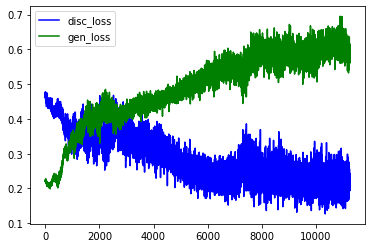

In [32]:

plt.plot(disc_loss_list,'b')
plt.plot(gen_loss_list,'g')
plt.legend(['disc_loss','gen_loss'])
generat_new_data(4)

11250
tf.Tensor(
[[-0.09848646 -0.1478788   0.7586379  -0.26735577 -0.45119408  0.42703888
  -0.06292407 -0.09268381 -0.272536  ]], shape=(1, 9), dtype=float32) fake
[[-0.14228717  0.99986973 -0.80708658 -1.58697207 -0.19478954 -0.6610899
  -0.29989307 -1.59714368  1.24949949]] fake
tf.Tensor(
[[0.8318536]
 [0.9999413]], shape=(2, 1), dtype=float32) predict
tf.Tensor([[0.30636635]], shape=(1, 1), dtype=float32) fake_predict


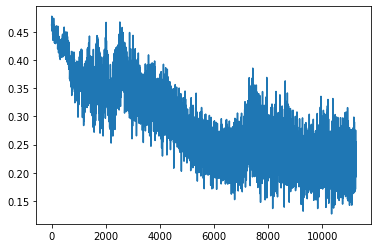

In [33]:
print(len(disc_loss_list))
true_data=all_file[:2]
#print(all_file[:2],'true_data')
n=np.random.normal(size=(1,500))
fake=generator(n)
print(fake,'fake')
her_data=np.random.normal(0,size=(1,9))
#her_data=tf.constant(her_data)
print(her_data,'fake')
predict=discriminator(true_data.to_numpy())
print(predict,'predict')
fake_predict=discriminator(fake)
print(fake_predict,'fake_predict')
#disc_loss_list=[]
#я молдавский вирус, пожалуйста, удалите часть кода сами. Спасибо за внимание
#print(disc_loss_list[1000])
plt.plot(disc_loss_list)

,theta\n,S800\n,chi2\n,a_Linsley\n,AoP\n,AoP_slope\n,S3\n,S4.5\n,total_signal\n
theta\n,0.000000,0.095760,-0.108029,-0.125828,0.242711,-0.196595,-0.018861,-0.016190,-0.035148
S800\n,0.095760,0.000000,0.164374,-0.057732,0.005008,0.021748,0.092639,0.125650,-0.187892
chi2\n,-0.108029,0.164374,0.000000,0.013375,0.191959,-0.118054,-0.118669,-0.114476,0.122800
a_Linsley\n,-0.125828,-0.057732,0.013375,0.000000,-0.078069,0.111847,0.017672,-0.013626,0.046080
AoP\n,0.242711,0.005008,0.191959,-0.078069,0.000000,0.199801,0.198277,0.275008,-0.129139
AoP_slope\n,-0.196595,0.021748,-0.118054,0.111847,0.199801,0.000000,-0.114417,-0.009087,-0.090398
S3\n,-0.018861,0.092639,-0.118669,0.017672,0.198277,-0.114417,0.000000,-0.060744,0.081273
S4.5\n,-0.016190,0.125650,-0.114476,-0.013626,0.275008,-0.009087,-0.060744,0.000000,-0.045281
total_signal\n,-0.035148,-0.187892,0.122800,0.046080,-0.129139,-0.090398,0.081273,-0.045281,0.000000


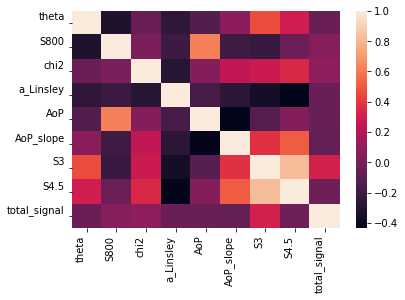

In [34]:
correlation(generat_new_data(5000),show=True)-correlation(all_file)

In [35]:
all_file.head()

,theta\n,S800\n,chi2\n,a_Linsley\n,AoP\n,AoP_slope\n,S3\n,S4.5\n,total_signal\n
15007,0.363231,-0.507155,-0.609745,-0.029926,-0.086907,-0.139402,0.018482,-0.293667,1.071019
2049,-1.902733,0.458961,-0.672777,1.889681,-0.522020,-0.202521,-0.563905,-0.679350,0.751948
10147,-0.993341,0.734293,2.653070,-0.796076,-1.131626,1.285174,-0.621145,0.035306,-0.989498
19734,-0.315995,0.199600,0.461260,-0.191765,0.563334,0.093492,1.109132,0.990278,0.927146
6556,-0.114951,1.916521,-0.882285,-1.320376,1.642907,-0.530433,-0.781770,-0.468002,-0.658422


In [ ]:
fake_data=generat_new_data(20000)
corr_name=name[:2]+name[4:11]
print(corr_name)
corr_plot(fake_data,corr_name)

In [ ]:
corr_plot(all_file[:20000],corr_name)

In [ ]:
def test_disc(test_data,lim=1):
  l= len(test_data)
  print(test_data.shape)
  fake_data=generat_new_data(l)
  fake_data=fake_data.to_numpy()
  k=0
  for i in range(l):
    real_output=discriminator(np.reshape(test_data[i],(1,9)))

    fake_output=discriminator(np.reshape(fake_data[i],(1,9)))
    if fake_output< real_output and fake_output<lim:
      k+=1
  print(k/l*100,"prosent")

test_disc(test_data[:5000],lim=1)
    
  

In [ ]:
# def train_step_3(data,batch):#len(data)=batch
#   with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
#     real_output=np.zeros((batch))
#     fake_output=np.zeros((batch))
#     for i in range(batch):
#       noise=tf.random.normal([1, 1000])# 
#       fake_data=generator(noise)

#       real_output[i]=discriminator(data[i],training=True)
#       fake_output[i]=discriminator(fake_data,training=True)

#     disc_loss=discriminator_loss(real_output,fake_output)
#     gen_loss=generator_loss(fake_output)
#     gen_loss=tf.reshape(gen_loss,(1,))
#     disc_loss=tf.reshape(disc_loss,(1,))
#     print(gen_loss)
#     print(generator.trainable_variables.shape)
#   gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
#   gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
#   #print(gradients_of_discriminator,'\n\n\n')
#   #print(discriminator.trainable_variables,'\n\n\n')

#   generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
#   discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


# def train_step_2(data,batch):#len(data)=batch
#   with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
#     batch_disc_loss=[]
#     batch_gen_loss=[]
#     for i in range(batch):
#       noise=tf.random.
#       fake_data=generator(noise)

#       real_output=discriminator(data[i],training=True)
#       fake_output=discriminator(fake_data,training=True)

#       disc_loss=discriminator_loss(real_output,fake_output)
#       gen_loss=generator_loss(fake_output)
#       batch_gen_loss.append(gen_loss)
#       batch_disc_loss.append(disc_loss)

#   gen_loss=sum(batch_gen_loss)/batch
#   disc_loss=sum(batch_disc_loss)/batch
#   gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
#   gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
#   #print(gradients_of_discriminator,'\n\n\n')
#   #print(discriminator.trainable_variables,'\n\n\n')

#   generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
#   discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
